In [7]:
from pgmpy.models import BayesianModel
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

In [8]:
def percentual_Transform(s):
    
    l = s.split("\/")
    l = list(map(lambda n: int(n),l))
    p = l[0]/l[1] * 100
    
    return p
    

print(percentual_Transform("50\/100"))
    

50.0


In [12]:
df = pd.read_csv("../parsing Dataset/log/Dataset.csv")

df["UserHP"] = df["UserHP"].map(percentual_Transform)
df["SuffererHP"] = df["SuffererHP"].map(percentual_Transform)

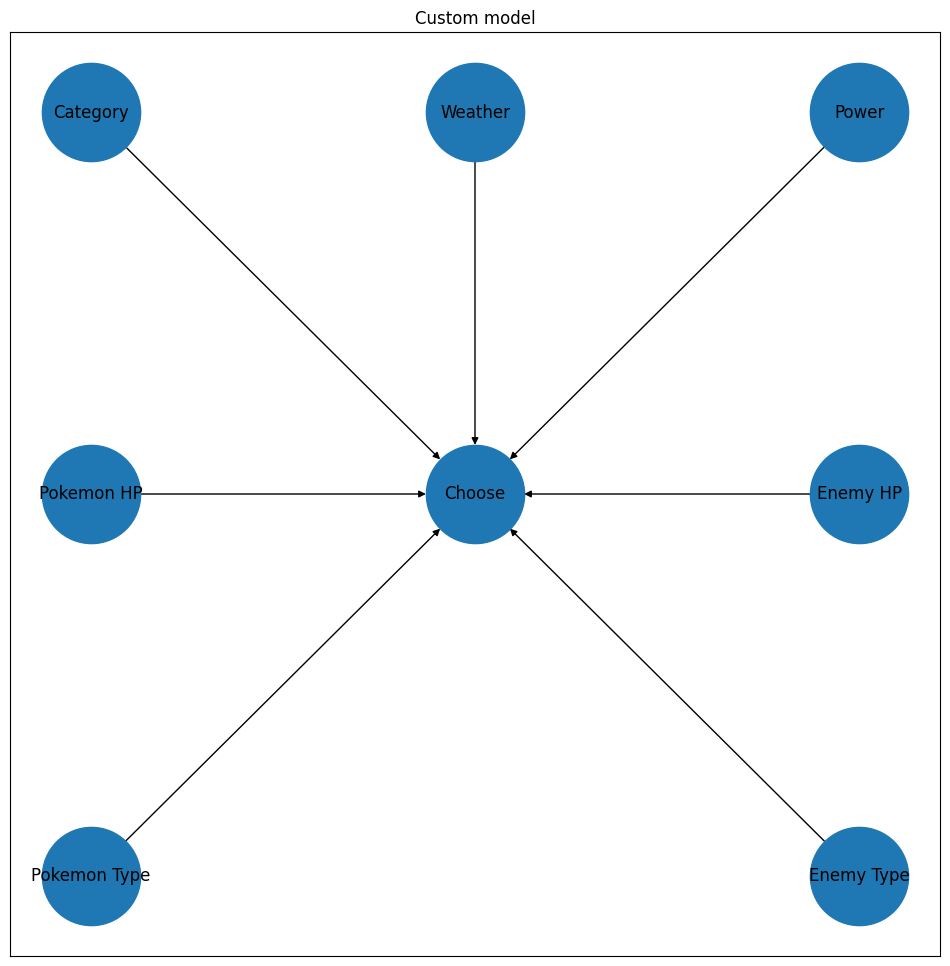

In [28]:
custom_model = BayesianModel([('Pokemon HP', 'Choose'), ('Enemy HP', 'Choose'),
                              ('Pokemon Type', 'Choose'), ('Enemy Type', 'Choose'), ('Power', 'Choose'),
                              ('Category', 'Choose'), ('Weather', 'Choose')])
pos = {'Pokemon HP': [0.75, -0.5], 'Enemy HP': [1.25, -0.5],
       'Pokemon Type': [0.75, -1.], 'Enemy Type': [1.25, -1],
       'Power': [1.25, 0],
       'Category': [0.75,  0], 'Weather': [1,  0],
       'Choose': [1, -0.5]}
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
nx.draw_networkx(custom_model, pos=pos, ax=ax, node_size=5000)
ax.set_title('Custom model')
fig.savefig('custom_bn')